Step 0: Setup and Initial Configuration

In [2]:
!pip install seaborn


In [3]:
# Install necessary packages (uncomment if not already installed)
# !pip install pandas numpy scikit-learn matplotlib seaborn

# Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

Step 1: Load the Data
Notebook Cell 1: Load the CSV file from the local directory

In [6]:
# Load the CSV file from the current directory
input_file_name = "output_draft.csv"

# Read the data into a pandas DataFrame
df = pd.read_csv(input_file_name)

# Display the first few rows to verify loading
df.head(10)


,GameID,tournamentID,tournamentName,locationName,Country,TournamentPlayers,created_at,userId,armyId,playerId,armyName,opponentId,opponentArmyId,opponentArmy,gameNum,gameResult,gamePoints,tournamentResult
0,1,urvDdD2QFh,G.A. League Season 2,Copenhagen,Danmark,24,2023-07-27T08:24:53.726Z,FC6M2HNVB8,LT7h2egMXA,PW73-PXD5-GXQ8,Pathfinders,9HD85AYUE6,iZGEmAny5r,Novitiates,1,2,20,1
1,2,urvDdD2QFh,G.A. League Season 2,Copenhagen,Danmark,24,2023-07-27T08:24:53.726Z,FC6M2HNVB8,LT7h2egMXA,PW73-PXD5-GXQ8,Pathfinders,yfs23dvEWL,qCkz7A5Npv,Inquisitorial Agents,2,2,19,1
2,3,urvDdD2QFh,G.A. League Season 2,Copenhagen,Danmark,24,2023-07-27T08:24:53.726Z,FC6M2HNVB8,LT7h2egMXA,PW73-PXD5-GXQ8,Pathfinders,16DLYTX7XH,7MZmTkjtvN,Veteran Guardsmen,3,2,20,1
3,4,urvDdD2QFh,G.A. League Season 2,Copenhagen,Danmark,24,2023-07-27T08:24:53.726Z,FC6M2HNVB8,LT7h2egMXA,PW73-PXD5-GXQ8,Pathfinders,uOmDO9mLcX,iZGEmAny5r,Novitiates,4,2,23,1
4,5,urvDdD2QFh,G.A. League Season 2,Copenhagen,Danmark,24,2023-07-27T08:24:53.726Z,FC6M2HNVB8,LT7h2egMXA,PW73-PXD5-GXQ8,Pathfinders,C1N48VV99K,O68BVNHb2J,Legionary,5,2,21,1
5,6,urvDdD2QFh,G.A. League Season 2,Copenhagen,Danmark,24,2023-07-27T08:24:53.726Z,VVXY1AVAXH,oIGBgz0rWT,GNQT-HTXC-TTEW,Ork Kommandos,yfs23dvEWL,qCkz7A5Npv,Inquisitorial Agents,1,2,19,2
6,7,urvDdD2QFh,G.A. League Season 2,Copenhagen,Danmark,24,2023-07-27T08:24:53.726Z,VVXY1AVAXH,oIGBgz0rWT,GNQT-HTXC-TTEW,Ork Kommandos,E7CHC4GTPH,KW8kBVQRzg,Intercession,2,2,19,2
7,8,urvDdD2QFh,G.A. League Season 2,Copenhagen,Danmark,24,2023-07-27T08:24:53.726Z,VVXY1AVAXH,oIGBgz0rWT,GNQT-HTXC-TTEW,Ork Kommandos,5HM4HU74UX,KW8kBVQRzg,Intercession,3,2,22,2
8,9,urvDdD2QFh,G.A. League Season 2,Copenhagen,Danmark,24,2023-07-27T08:24:53.726Z,VVXY1AVAXH,oIGBgz0rWT,GNQT-HTXC-TTEW,Ork Kommandos,0qDv3IW6Zp,HiiZAf9oBt,Fellgor Ravagers,4,2,21,2
9,10,urvDdD2QFh,G.A. League Season 2,Copenhagen,Danmark,24,2023-07-27T08:24:53.726Z,VVXY1AVAXH,oIGBgz0rWT,GNQT-HTXC-TTEW,Ork Kommandos,L5P78ERAV2,HTyPzmoxpg,Wyrmblade,5,2,20,2


Step 2: Inspect and Clean Data
Notebook Cell 2: Inspect the data for missing values, inconsistencies, and data types.

In [7]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values in Each Column:\n", missing_values)

# Check data types
print("Data Types:\n", df.dtypes)

# Display summary statistics for numerical features
df.describe()

Missing Values in Each Column:
 GameID                0
tournamentID          0
tournamentName        0
locationName          0
Country               0
TournamentPlayers     0
created_at            0
userId                0
armyId                0
playerId              0
armyName             37
opponentId            0
opponentArmyId        0
opponentArmy          0
gameNum               0
gameResult            0
gamePoints            0
tournamentResult      0
dtype: int64
Data Types:
 GameID                int64
tournamentID         object
tournamentName       object
locationName         object
Country              object
TournamentPlayers     int64
created_at           object
userId               object
armyId               object
playerId             object
armyName             object
opponentId           object
opponentArmyId       object
opponentArmy         object
gameNum               int64
gameResult            int64
gamePoints            int64
tournamentResult      int64
dtype:

,GameID,TournamentPlayers,gameNum,gameResult,gamePoints,tournamentResult
count,4762.000000,4762.000000,4762.000000,4762.000000,4762.00000,4762.000000
mean,1172.597438,30.644897,2.526039,1.002310,15.01722,15.559219
std,682.037052,20.825621,1.374389,0.972093,5.24835,14.414017
min,1.000000,0.000000,1.000000,0.000000,0.00000,1.000000
25%,576.000000,15.000000,1.000000,0.000000,12.00000,5.000000
50%,1166.500000,22.000000,2.000000,1.000000,15.00000,11.000000
75%,1766.750000,55.000000,3.000000,2.000000,19.00000,20.000000
max,2363.000000,68.000000,7.000000,2.000000,40.00000,68.000000


Notebook Cell 3: Handle missing values by filling with default values or removing rows.

In [8]:
# Fill missing values in 'armyName' using 'Unknown' (if applicable, already handled in previous steps)
df['armyName'] = df['armyName'].fillna('Unknown')

# Drop rows with missing essential values (if necessary)
df = df.dropna(subset=['gamePoints', 'gameResult', 'armyId'])

# Verify changes
df.isnull().sum()


GameID               0
tournamentID         0
tournamentName       0
locationName         0
Country              0
TournamentPlayers    0
created_at           0
userId               0
armyId               0
playerId             0
armyName             0
opponentId           0
opponentArmyId       0
opponentArmy         0
gameNum              0
gameResult           0
gamePoints           0
tournamentResult     0
dtype: int64

Step 3: Feature Engineering
Notebook Cell 4: Extract temporal features from the created_at column

In [9]:
# Convert 'created_at' to datetime format
df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')

# Extract year and month as new features
df['tournament_year'] = df['created_at'].dt.year
df['tournament_month'] = df['created_at'].dt.month

# Drop the original 'created_at' column if not needed
df = df.drop(columns=['created_at'])

# Display the updated DataFrame
df.head()


,GameID,tournamentID,tournamentName,locationName,Country,TournamentPlayers,userId,armyId,playerId,armyName,opponentId,opponentArmyId,opponentArmy,gameNum,gameResult,gamePoints,tournamentResult,tournament_year,tournament_month
0,1,urvDdD2QFh,G.A. League Season 2,Copenhagen,Danmark,24,FC6M2HNVB8,LT7h2egMXA,PW73-PXD5-GXQ8,Pathfinders,9HD85AYUE6,iZGEmAny5r,Novitiates,1,2,20,1,2023,7
1,2,urvDdD2QFh,G.A. League Season 2,Copenhagen,Danmark,24,FC6M2HNVB8,LT7h2egMXA,PW73-PXD5-GXQ8,Pathfinders,yfs23dvEWL,qCkz7A5Npv,Inquisitorial Agents,2,2,19,1,2023,7
2,3,urvDdD2QFh,G.A. League Season 2,Copenhagen,Danmark,24,FC6M2HNVB8,LT7h2egMXA,PW73-PXD5-GXQ8,Pathfinders,16DLYTX7XH,7MZmTkjtvN,Veteran Guardsmen,3,2,20,1,2023,7
3,4,urvDdD2QFh,G.A. League Season 2,Copenhagen,Danmark,24,FC6M2HNVB8,LT7h2egMXA,PW73-PXD5-GXQ8,Pathfinders,uOmDO9mLcX,iZGEmAny5r,Novitiates,4,2,23,1,2023,7
4,5,urvDdD2QFh,G.A. League Season 2,Copenhagen,Danmark,24,FC6M2HNVB8,LT7h2egMXA,PW73-PXD5-GXQ8,Pathfinders,C1N48VV99K,O68BVNHb2J,Legionary,5,2,21,1,2023,7


Step 4: Categorical Encoding
Notebook Cell 5: Encode categorical features using OneHotEncoder

In [10]:
# Identify categorical columns
categorical_cols = ['armyName', 'locationName', 'Country', 'opponentArmyId']

# Apply OneHotEncoding to categorical columns
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoded_features = encoder.fit_transform(df[categorical_cols])

# Create DataFrame for encoded features
encoded_feature_names = encoder.get_feature_names_out(categorical_cols)
df_encoded = pd.DataFrame(encoded_features, columns=encoded_feature_names)

# Concatenate the encoded features with the original DataFrame
df = pd.concat([df, df_encoded], axis=1)
# Drop the original categorical columns
df = df.drop(columns=categorical_cols)

# Verify the DataFrame
df.head()


c:\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,GameID,tournamentID,tournamentName,TournamentPlayers,userId,armyId,playerId,opponentId,opponentArmy,gameNum,...,opponentArmyId_oIGBgz0rWT,opponentArmyId_pAKAeIH3Ay,opponentArmyId_pU36RuQWCD,opponentArmyId_qCkz7A5Npv,opponentArmyId_qcqbbnVVZB,opponentArmyId_tCYU740UMU,opponentArmyId_tRd2ijWxXT,opponentArmyId_tt0dDf3Adz,opponentArmyId_udcWHTxEOX,opponentArmyId_y9bh89ACze
0,1,urvDdD2QFh,G.A. League Season 2,24,FC6M2HNVB8,LT7h2egMXA,PW73-PXD5-GXQ8,9HD85AYUE6,Novitiates,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,urvDdD2QFh,G.A. League Season 2,24,FC6M2HNVB8,LT7h2egMXA,PW73-PXD5-GXQ8,yfs23dvEWL,Inquisitorial Agents,2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,urvDdD2QFh,G.A. League Season 2,24,FC6M2HNVB8,LT7h2egMXA,PW73-PXD5-GXQ8,16DLYTX7XH,Veteran Guardsmen,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,urvDdD2QFh,G.A. League Season 2,24,FC6M2HNVB8,LT7h2egMXA,PW73-PXD5-GXQ8,uOmDO9mLcX,Novitiates,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,urvDdD2QFh,G.A. League Season 2,24,FC6M2HNVB8,LT7h2egMXA,PW73-PXD5-GXQ8,C1N48VV99K,Legionary,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Step 5: Numerical Feature Normalization
Notebook Cell 6: Normalize numerical features using StandardScaler

In [11]:
# Identify numerical columns to normalize
numerical_cols = ['TournamentPlayers', 'gamePoints', 'gameNum', 'tournament_year', 'tournament_month']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Display the scaled DataFrame
df.head()

,GameID,tournamentID,tournamentName,TournamentPlayers,userId,armyId,playerId,opponentId,opponentArmy,gameNum,...,opponentArmyId_oIGBgz0rWT,opponentArmyId_pAKAeIH3Ay,opponentArmyId_pU36RuQWCD,opponentArmyId_qCkz7A5Npv,opponentArmyId_qcqbbnVVZB,opponentArmyId_tCYU740UMU,opponentArmyId_tRd2ijWxXT,opponentArmyId_tt0dDf3Adz,opponentArmyId_udcWHTxEOX,opponentArmyId_y9bh89ACze
0,1,urvDdD2QFh,G.A. League Season 2,-0.319107,FC6M2HNVB8,LT7h2egMXA,PW73-PXD5-GXQ8,9HD85AYUE6,Novitiates,-1.110457,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,urvDdD2QFh,G.A. League Season 2,-0.319107,FC6M2HNVB8,LT7h2egMXA,PW73-PXD5-GXQ8,yfs23dvEWL,Inquisitorial Agents,-0.382784,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,urvDdD2QFh,G.A. League Season 2,-0.319107,FC6M2HNVB8,LT7h2egMXA,PW73-PXD5-GXQ8,16DLYTX7XH,Veteran Guardsmen,0.344888,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,urvDdD2QFh,G.A. League Season 2,-0.319107,FC6M2HNVB8,LT7h2egMXA,PW73-PXD5-GXQ8,uOmDO9mLcX,Novitiates,1.072560,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,urvDdD2QFh,G.A. League Season 2,-0.319107,FC6M2HNVB8,LT7h2egMXA,PW73-PXD5-GXQ8,C1N48VV99K,Legionary,1.800233,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Step 6: Save the Processed Data
Notebook Cell 7: Save the processed DataFrame locally

In [12]:
# Save the processed DataFrame to a new CSV file in the current directory
processed_file_name = "Player_test_data_processed.csv"
df.to_csv(processed_file_name, index=False)

print(f"Processed data saved locally as: {processed_file_name}")


Processed data saved locally as: Player_test_data_processed.csv


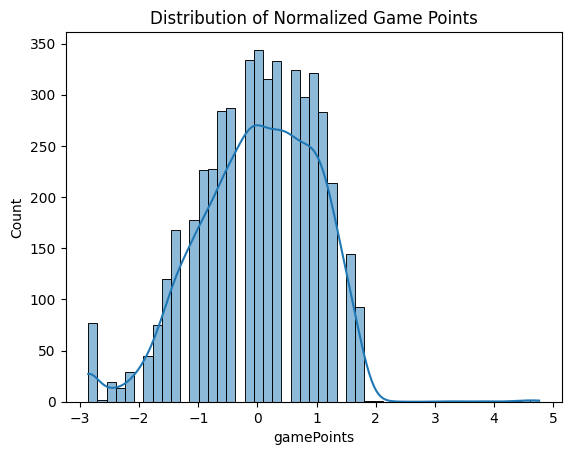

In [13]:
#verification and testing
# Example: Plot histogram of normalized 'gamePoints'
sns.histplot(df['gamePoints'], kde=True)
plt.title('Distribution of Normalized Game Points')
plt.show()
